In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from IPython.display import display, Image
import ipywidgets as widgets
import threading

Initially I tried to work it with actual viens from a photo. Eventually I determined it's really difficult to do with just a webcam, so in the end the final prototype presented found drawn lines onto a peice of paper 

In [35]:
img = cv2.imread("IMG_0345.JPG")
colored = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

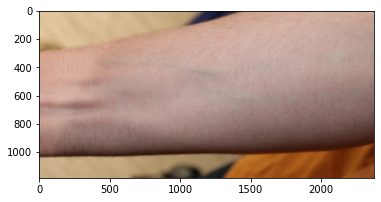

In [60]:
cropped = colored[400:-400, 300:-300]
plt.imshow(cropped)

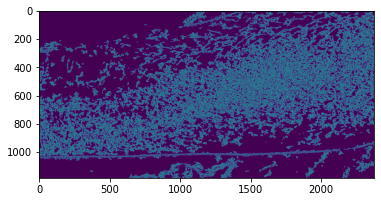

In [65]:
edges = cv2.Canny(cropped,1,50)
plt.imshow(edges)

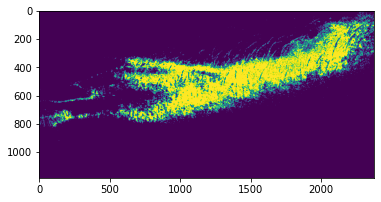

In [79]:
plt.imshow(cv2.inRange(cropped,np.array([150,150,150]),np.array([200,200,200])))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


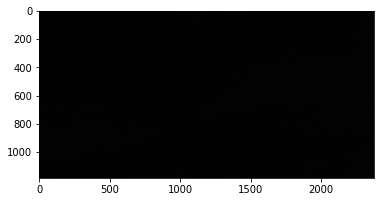

In [86]:
laplacian = cv2.Laplacian(cropped, cv2.CV_16S)
plt.imshow(laplacian)

In [94]:
otsu_threshold, image_result = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU,)

In [89]:
img = cv2.imread("IMG_0345.JPG", 0)


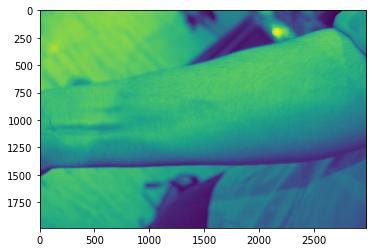

In [91]:
plt.imshow(img)

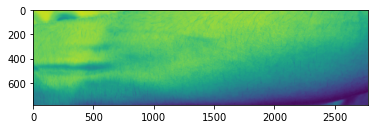

In [213]:
img = cv2.imread("IMG_0345.JPG",0)
cropped = img[600:-600,100:-100]
plt.imshow(cropped)


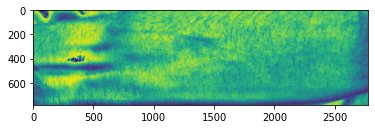

In [214]:
clahe = cv2.createCLAHE(clipLimit = 5)
final_img = clahe.apply(cropped) + 20
plt.imshow(final_img)

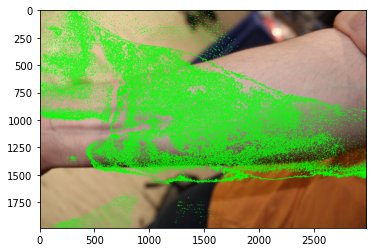

In [165]:
image_copy = colored.copy()
thingy = cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
plt.imshow(thingy)

In [141]:
countours, heirachy = cv2.findContours(nowWithEdges , cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [149]:
cv2.drawContours(newImageYetAgain,countours,-1, (0, 255, 0), 3)

NameError: name 'newImageYetAgain' is not defined

In [159]:
contours, heirachy = cv2.findContours(nowWithEdges , cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
image_copy = colored.copy()
thingy = cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

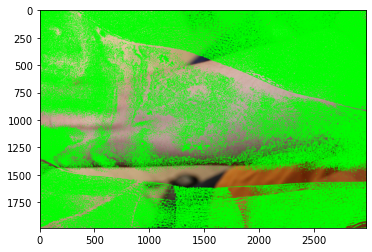

In [160]:
plt.imshow(thingy)

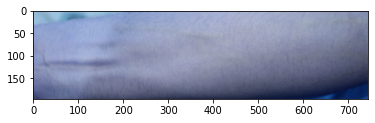

In [256]:
img = cv2.imread("IMG_0345.JPG",cv2.COLOR_BGR2HSV)
cropped = img[150:-150]
plt.imshow(cropped)

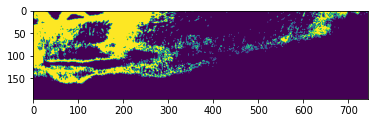

In [260]:
lower = np.array([85, 100, 180], dtype="uint8")
upper = np.array([150, 255, 255], dtype="uint8")

mask = cv2.inRange(cropped, lower, upper)
plt.imshow(mask)

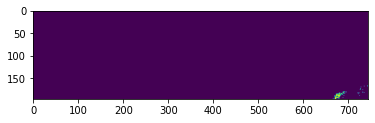

In [41]:

import cv2
import numpy as np
from scipy import stats
import time

cap = cv2.VideoCapture(0)
kernel = np.ones((5,5),np.uint8)
clahe = cv2.createCLAHE(clipLimit = 2) 

while(True):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    og = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    gray = cv2.GaussianBlur(gray, (5,5), 0)
    gray = cv2.medianBlur(gray, 7)
    gray = clahe.apply(gray)
    #gray = cv2.filter2D(gray, cv2.CV_8UC3, g_kernel)
    ret2, th3 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    after = cv2.bitwise_and(gray, gray, mask = th3)
#     th4 = cv2.adaptiveThreshold(gray,20,cv2.ADAPTIVE_THRESH_MEAN_C,\
#             cv2.THRESH_BINARY,11,2)
#     th4 = cv2.erode(th4,kernel,iterations = 1)
#     th4 = cv2.dilate(th4, kernel)
#     th4 = cv2.erode(th4,kernel,iterations = 1)

    gray = cv2.Canny(after, 10,50)
    contours, hierarchy = cv2.findContours(gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(og, contours, -1, (0, 0, 255), 6)
    img3 = cv2.hconcat([og, after])
    cv2.imshow('frame', img3)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [36]:
hierarchy[0][1]

array([ 2,  0, -1, -1], dtype=int32)

In [11]:

import cv2
import numpy as np
from scipy import stats
import time

lower_red = np.array([170,50,50])
upper_red = np.array([180,255,255])
cap = cv2.VideoCapture(0)
kernel = np.ones((5,5),np.uint8)
clahe = cv2.createCLAHE(clipLimit = 2) 

while(True):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    og = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    gray = cv2.inRange(gray, lower_red, upper_red)
    gray = cv2.GaussianBlur(gray, (5,5), 0)
    gray = cv2.medianBlur(gray, 7)
    gray = clahe.apply(gray)
    #gray = cv2.filter2D(gray, cv2.CV_8UC3, g_kernel)
    ret2, th3 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    after = cv2.bitwise_and(gray, gray, mask = th3)
#     th4 = cv2.adaptiveThreshold(gray,20,cv2.ADAPTIVE_THRESH_MEAN_C,\
#             cv2.THRESH_BINARY,11,2)
#     th4 = cv2.erode(th4,kernel,iterations = 1)
#     th4 = cv2.dilate(th4, kernel)
#     th4 = cv2.erode(th4,kernel,iterations = 1)

    gray = cv2.Canny(after, 10,50)
    contours, hierarchy = cv2.findContours(gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    sorted_contours= sorted(contours, key=cv2.contourArea, reverse= False)
    cv2.drawContours(og, sorted_countours, -1, (0, 0, 255), 6)
    img3 = cv2.hconcat([og, after])
    cv2.imshow('frame', img3)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


error: OpenCV(4.5.4) /tmp/pip-req-build-kv0l0wqx/opencv/modules/core/src/arithm.cpp:1741: error: (-209:Sizes of input arguments do not match) The lower boundary is neither an array of the same size and same type as src, nor a scalar in function 'inRange'


Final code that was presented. Located lines on the paper, and when the camera window was closed prints the location of the largest countour found.

In [10]:
import cv2
import numpy as np
from scipy import stats
import time
# Definition for the color
lower_red = np.array([160,100,50])
upper_red = np.array([179,255,255])
#Get the camera
cap = cv2.VideoCapture(0)

while(True):
    ret, frame = cap.read()
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    og = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    # Get just for red
    img = cv2.inRange(img, lower_red, upper_red)
    img = cv2.Canny(img, 10, 200)
    #Canny edge detection
    borders = cv2.Canny(img, 10, 200)
    # Find countours 
    contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    # Find the widest
    sorted_contours= sorted(contours, key=cv2.contourArea, reverse= False)
    # Draw them
    cv2.drawContours(og, sorted_contours, -1, (255, 255, 255), 3) 

    cv2.imshow('frame', og)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        
        try:
            coolX = sorted_contours[0][0][0][0]
            coolY = sorted_contours[0][0][0][1]
        except:
            pass
        break
# After quit the view gives x and y points
print(coolX,coolY)
cap.release()
cv2.destroyAllWindows()


error: OpenCV(4.5.4) /tmp/pip-req-build-kv0l0wqx/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
